In [29]:
import pandas as pd
import numpy as np

In [30]:
df=pd.read_csv("Google_Stock_Price_Train.csv")

In [31]:
df

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.250000,332.830000,324.970000,663.59,"7,380,500"
1,01/04/2012,331.270000,333.870000,329.080000,666.45,"5,749,400"
2,01/05/2012,329.830000,330.750000,326.890000,657.21,"6,590,300"
3,01/06/2012,328.340000,328.770000,323.680000,648.24,"5,405,900"
4,01/09/2012,322.040000,322.290000,309.460000,620.76,"11,688,800"
...,...,...,...,...,...,...
1504,22/12/2017,1061.109985,1064.199951,1059.439941,1060.119995,755100
1505,26/12/2017,1058.069946,1060.119995,1050.199951,1056.73999,760600
1506,27/12/2017,1057.390015,1058.369995,1048.050049,1049.369995,1271900
1507,28/12/2017,1051.599976,1054.750000,1044.770020,1048.140015,837100


In [32]:
train=df.iloc[:,1:2].values

In [33]:
train

array([[ 325.25    ],
       [ 331.27    ],
       [ 329.83    ],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
sc=MinMaxScaler(feature_range=(0,1))
train_scaled=sc.fit_transform(train)

In [36]:
train_scaled

array([[0.05794644],
       [0.0655085 ],
       [0.06369963],
       ...,
       [0.97762796],
       [0.97035477],
       [0.96422472]])

In [37]:
x_train=[]
y_train=[]

for i in range(60,len(train_scaled)):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])

In [38]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [39]:
x_train

array([[0.05794644, 0.0655085 , 0.06369963, ..., 0.05298463, 0.05425334,
        0.05738117],
       [0.0655085 , 0.06369963, 0.06182796, ..., 0.05425334, 0.05738117,
        0.05826048],
       [0.06369963, 0.06182796, 0.05391418, ..., 0.05738117, 0.05826048,
        0.05720531],
       ...,
       [0.85526583, 0.84775405, 0.85152251, ..., 0.98712441, 0.98230082,
        0.97848205],
       [0.84775405, 0.85152251, 0.84962571, ..., 0.98230082, 0.97848205,
        0.97762796],
       [0.85152251, 0.84962571, 0.86370723, ..., 0.97848205, 0.97762796,
        0.97035477]])

In [40]:
x_train.shape

(1449, 60)

In [41]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [42]:
x_train.shape

(1449, 60, 1)

In [43]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [44]:
model=Sequential()

In [45]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(rate=0.2))

In [46]:
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(rate=0.2))

In [47]:
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(rate=0.2))

In [48]:
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

In [50]:
model.compile(optimizer="adam",loss="mse")

In [51]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
46/46 [==============================] - 23s 170ms/step - loss: 0.0233
Epoch 2/100
46/46 [==============================] - 8s 167ms/step - loss: 0.0038
Epoch 3/100
46/46 [==============================] - 8s 171ms/step - loss: 0.0035
Epoch 4/100
46/46 [==============================] - 9s 186ms/step - loss: 0.0032
Epoch 5/100
46/46 [==============================] - 9s 204ms/step - loss: 0.0030
Epoch 6/100
46/46 [==============================] - 9s 204ms/step - loss: 0.0032
Epoch 7/100
46/46 [==============================] - 9s 194ms/step - loss: 0.0033
Epoch 8/100
46/46 [==============================] - 8s 164ms/step - loss: 0.0032
Epoch 9/100
46/46 [==============================] - 8s 165ms/step - loss: 0.0026
Epoch 10/100
46/46 [==============================] - 8s 183ms/step - loss: 0.0025
Epoch 11/100
46/46 [==============================] - 9s 189ms/step - loss: 0.0026
Epoch 12/100
46/46 [==============================] - 9s 191ms/step - loss: 0.0026
Epoch 13/100

In [52]:
test_df=pd.read_csv("Google_Stock_Price_Test.csv")

In [53]:
test_df

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600
...,...,...,...,...,...,...
120,25/06/2018,1143.599976,1143.910034,1112.780029,1124.810059,2157300
121,26/06/2018,1128.000000,1133.209961,1116.659058,1118.459961,1563200
122,27/06/2018,1121.339966,1131.836060,1103.619995,1103.979980,1293900
123,28/06/2018,1102.089966,1122.310059,1096.010010,1114.219971,1072400


In [54]:
final=pd.concat((df["Open"],test_df["Open"]),axis=0)

In [55]:
real_values=test_df.iloc[:,1:2].values
real_values

array([[1048.339966],
       [1064.310059],
       [1088.      ],
       [1094.      ],
       [1102.22998 ],
       [1109.400024],
       [1097.099976],
       [1106.300049],
       [1102.410034],
       [1132.51001 ],
       [1126.219971],
       [1131.410034],
       [1131.829956],
       [1137.48999 ],
       [1159.849976],
       [1177.329956],
       [1172.530029],
       [1175.079956],
       [1176.47998 ],
       [1167.829956],
       [1170.569946],
       [1162.609985],
       [1122.      ],
       [1090.599976],
       [1027.180054],
       [1081.540039],
       [1055.410034],
       [1017.25    ],
       [1048.      ],
       [1045.      ],
       [1048.949951],
       [1079.069946],
       [1088.410034],
       [1090.569946],
       [1106.469971],
       [1116.189941],
       [1112.640015],
       [1127.800049],
       [1141.23999 ],
       [1123.030029],
       [1107.869995],
       [1053.079956],
       [1075.140015],
       [1099.219971],
       [1089.189941],
       [11

In [56]:
real_values.shape

(125, 1)

In [57]:
inputs=final[len(final)-len(test_df)-60:].values

C:\Users\prati\AppData\Local\Temp\ipykernel_4204\3004761951.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs=final[len(final)-len(test_df)-60:].values


In [58]:
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [59]:
inputs=inputs.reshape(-1,1)

In [60]:
inputs=sc.transform(inputs)

In [61]:
x_test=[]
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])

In [62]:
x_test=np.array(x_test)

In [63]:
x_test

array([[0.84962571, 0.86370723, 0.88041408, ..., 0.97762796, 0.97035477,
        0.96422472],
       [0.86370723, 0.88041408, 0.88041408, ..., 0.97035477, 0.96422472,
        0.96625969],
       [0.88041408, 0.88041408, 0.87252539, ..., 0.96422472, 0.96625969,
        0.98632061],
       ...,
       [0.92301027, 0.89725909, 0.95745403, ..., 1.10544175, 1.08592105,
        1.06632506],
       [0.89725909, 0.95745403, 0.93066029, ..., 1.08592105, 1.06632506,
        1.05795902],
       [0.95745403, 0.93066029, 0.92664058, ..., 1.06632506, 1.05795902,
        1.03377803]])

In [64]:
x_test.shape

(125, 60)

In [66]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [67]:
predicted_price=model.predict(x_test)

4/4 [==============================] - 1s 20ms/step


In [68]:
price=sc.inverse_transform(predicted_price)

In [69]:
price

array([[1038.918  ],
       [1037.657  ],
       [1040.3188 ],
       [1049.3159 ],
       [1060.8492 ],
       [1071.4003 ],
       [1079.4075 ],
       [1081.5758 ],
       [1081.4795 ],
       [1080.3672 ],
       [1084.9585 ],
       [1091.5428 ],
       [1097.9143 ],
       [1102.5227 ],
       [1106.1512 ],
       [1112.9176 ],
       [1123.6559 ],
       [1132.8197 ],
       [1138.5598 ],
       [1141.4066 ],
       [1140.9152 ],
       [1139.7667 ],
       [1137.9509 ],
       [1129.3108 ],
       [1113.4883 ],
       [1087.5621 ],
       [1071.2697 ],
       [1063.5135 ],
       [1055.1368 ],
       [1051.5562 ],
       [1051.7626 ],
       [1053.8335 ],
       [1060.7185 ],
       [1070.042  ],
       [1077.4927 ],
       [1083.6843 ],
       [1089.1956 ],
       [1092.1438 ],
       [1095.4183 ],
       [1101.0652 ],
       [1103.5416 ],
       [1100.3667 ],
       [1085.4996 ],
       [1071.5118 ],
       [1068.195  ],
       [1071.5657 ],
       [1081.4215 ],
       [1095.

In [70]:
real_values

array([[1048.339966],
       [1064.310059],
       [1088.      ],
       [1094.      ],
       [1102.22998 ],
       [1109.400024],
       [1097.099976],
       [1106.300049],
       [1102.410034],
       [1132.51001 ],
       [1126.219971],
       [1131.410034],
       [1131.829956],
       [1137.48999 ],
       [1159.849976],
       [1177.329956],
       [1172.530029],
       [1175.079956],
       [1176.47998 ],
       [1167.829956],
       [1170.569946],
       [1162.609985],
       [1122.      ],
       [1090.599976],
       [1027.180054],
       [1081.540039],
       [1055.410034],
       [1017.25    ],
       [1048.      ],
       [1045.      ],
       [1048.949951],
       [1079.069946],
       [1088.410034],
       [1090.569946],
       [1106.469971],
       [1116.189941],
       [1112.640015],
       [1127.800049],
       [1141.23999 ],
       [1123.030029],
       [1107.869995],
       [1053.079956],
       [1075.140015],
       [1099.219971],
       [1089.189941],
       [11

In [71]:
import matplotlib.pyplot as plt

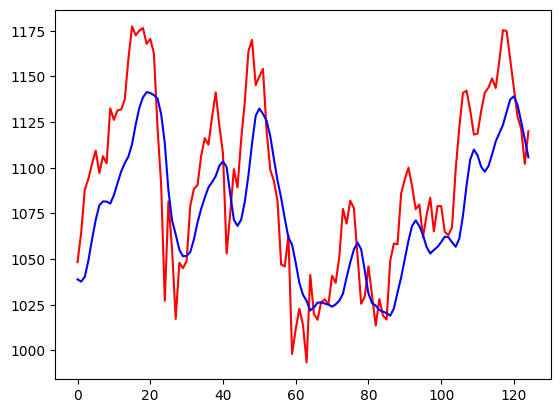

In [74]:
plt.plot(real_values,color="red")
plt.plot(price,color="blue")

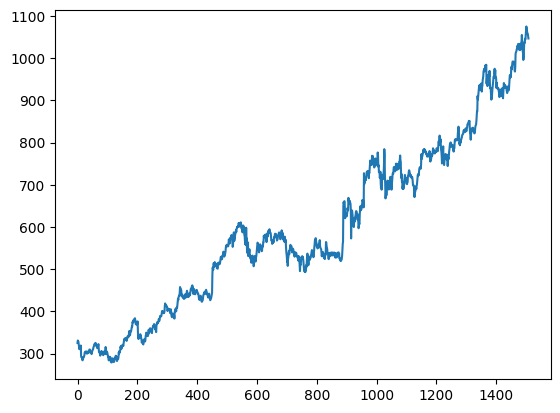

In [76]:
plt.plot(df["Open"])